In [2]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [3]:
# The theoretical capacity of the cells modelled by Marinescu-type 0D models are given
# by cth = (3 * ne * F * S8 / (ns8 * Ms) + ne * F * S4/ (ns4 * Ms)) / 3600

Ms = 32
n4 = 4
F = 9.649e4
S8_initial = 2.6730
ns8 = 8
S4_initial = 0.0128
ns4 = 4
cth = ((3 * n4 * F * S8_initial / (ns8 * Ms)) + (n4 * F * S4_initial / (ns4 * Ms))) / 3600

print("Theoretical Capacity = %2.2f Ah" %(cth))

Theoretical Capacity = 3.37 Ah


In [4]:
# let us take the theoretical capacity down to the level of the 0.211 Ah battery from Hunt.

# define the initial values in grams of various species
S8_initial_g = 2.6730
S4_initial_g = 0.0128
S2_initial_g = 4.3321e-6
S1_initial_g = 1.6321e-6
Sp_initial_g = 2.7e-06

# the total active material mass
m_s = S8_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168

# check that the new cell capacity is same as Hunt's
cth = ((3 * n4 * F * S8_initial_frac*m_s_hunt / (ns8 * Ms)) + (n4 * F * S4_initial_frac*m_s_hunt / (ns4 * Ms))) / 3600
print("Theoretical Capacity = %2.3f Ah" %(cth))

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

Theoretical Capacity = 0.211 Ah


In [4]:
# let us now check the change in discharge profiles induced by 
# by capacity changes (all at the same C rate)

'''
Notice that all Marinescu-type models will have the same discharge profile
except for the miniscule effect of degredation for the 2018 paper. 
'''

# instantiate models
model1 = pybamm.lithium_sulfur.MarinescuEtAl2016()
model2 = pybamm.lithium_sulfur.MarinescuEtAl2016()

# set up the parameters and initial conditions
current1 = current
current2 = current*10

params1 = model1.default_parameter_values
params1.update(
    {
        "Current function [A]": current1,
        "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt,
        "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt,
        "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt,
        "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)

params2 = model2.default_parameter_values
params2.update(
    {
        "Current function [A]": current2,
        "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt*10,
        "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt*10,
        "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt*10,
        "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt*10,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt*10,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
    }
)




In [5]:
# run the simulations
sim1 = pybamm.Simulation(
    model1,
    parameter_values=params1,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)

hours= 10/2
time_in_seconds1 = hours*3600
sim1.solve(np.linspace(0, time_in_seconds1, 100000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

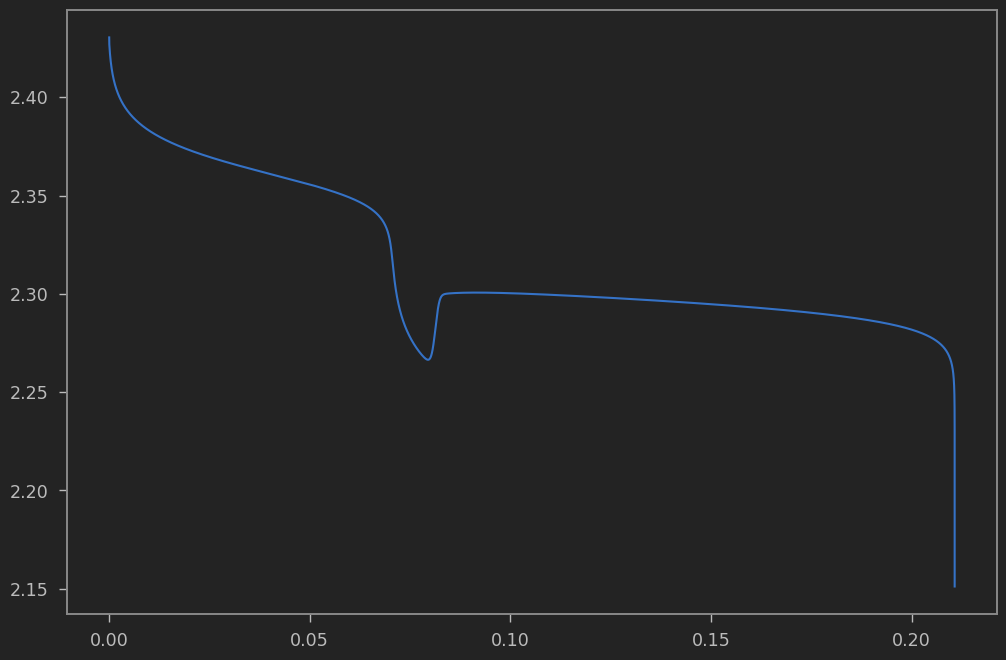

In [6]:
# plot the output
voltage1 = sim1.solution['Terminal voltage [V]'].entries
Ah1 = current*sim1.solution.t/3600
plt.plot(Ah1, voltage1) 

In [7]:
# run the simulations
sim2 = pybamm.Simulation(
    model2,
    parameter_values=params2,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
    ),
)

hours = 10/2
time_in_seconds2 = hours*3600 - 100 # failure at 10 hours exactly
sim2.solve(np.linspace(0, time_in_seconds2, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0311009 and

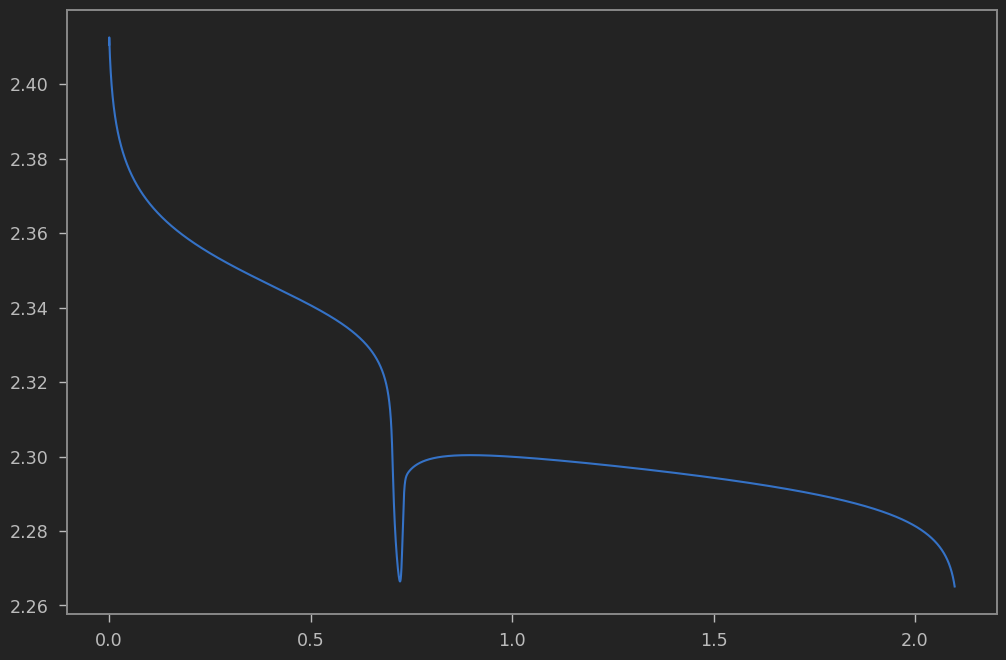

In [8]:
# plot the output
voltage2 = sim2.solution['Terminal voltage [V]'].entries
Ah2 = current2*sim2.solution.t/3600
plt.plot(Ah2, voltage2)

2020-12-08 15:54:19,631 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-08 15:54:19,631 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


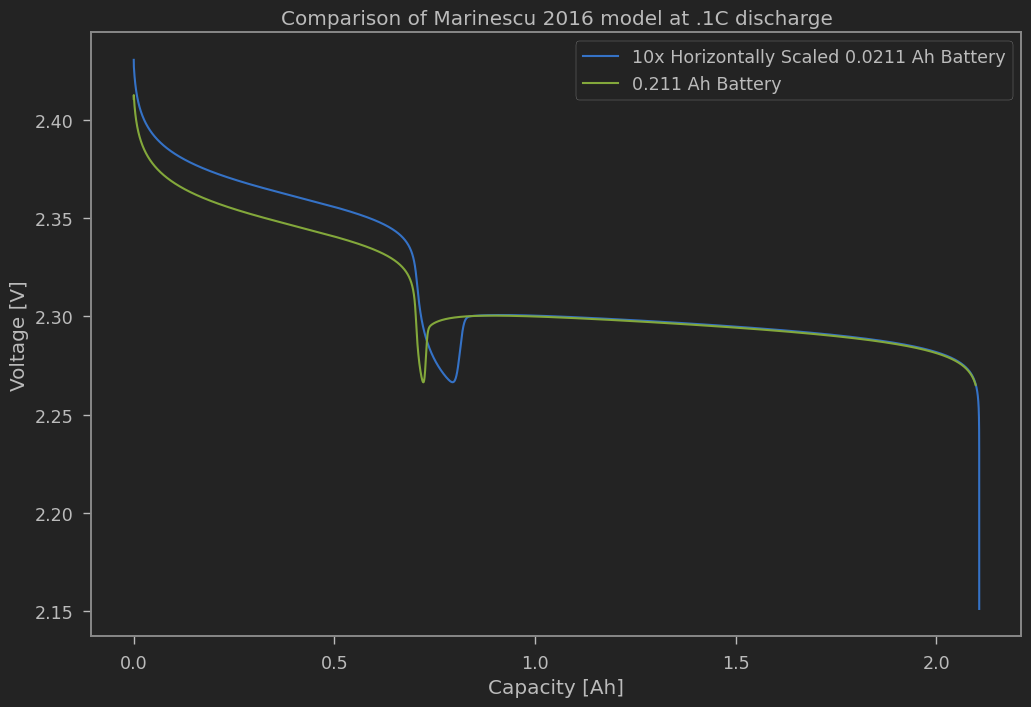

In [9]:
# comparison

plt.plot(Ah1*10, voltage1) # adjusting to scale with second battery
plt.plot(Ah2, voltage2)

plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(["10x Horizontally Scaled 0.0211 Ah Battery", "0.211 Ah Battery"])
plt.title("Comparison of Marinescu 2016 model at .1C discharge")
plt.savefig("Battery Capacity Comparison.eps")

# Figure 4(a) Recreation

## Here we set the reference temperature to the experimental values

In [5]:
def marinescu2016_discharge_function(temperature):
    # instantiate models
    model1 = pybamm.lithium_sulfur.MarinescuEtAl2016()

    # set up the parameters and initial conditions
    current1 = current

    params1 = model1.default_parameter_values
    params1.update(
        {
            "Current function [A]": current1,
            "Initial Condition for S8 ion [g]": S8_initial_frac*m_s_hunt,
            "Initial Condition for S4 ion [g]": S4_initial_frac*m_s_hunt,
            "Initial Condition for S2 ion [g]": S2_initial_frac*m_s_hunt,
            "Initial Condition for S ion [g]": S1_initial_frac*m_s_hunt,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial_frac*m_s_hunt,
            "Initial Condition for Terminal Voltage [V]": 2.4,
            "Shuttle rate coefficient during charge [s-1]": 0.0002,
            "Shuttle rate coefficient during discharge [s-1]": 0.0,
            "Reference Temperature [K]": temperature
        }
    )
    # run the simulations
    sim1 = pybamm.Simulation(
        model1,
        parameter_values=params1,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
            ),
        )

    hours= 10/2
    time_in_seconds1 = hours*3600
    sim1.solve(np.linspace(0, time_in_seconds1, 1000))
    
    t = sim1.solution.t
    Ah = abs(current)*t/3600
    V = sim1.solution["Terminal voltage [V]"].entries
    S8 = sim1.solution["S8 [g]"].entries
    S4 = sim1.solution["S4 [g]"].entries
    S2 = sim1.solution["S2 [g]"].entries
    S1 = sim1.solution["S [g]"].entries
    Sp = sim1.solution["Precipitated Sulfur [g]"].entries
    
    data = t, Ah, V, S8, S4, S2, S1, Sp
    return data

In [6]:
# The experimental Temperatures are 20, 30, 40 degrees celcius.
temp_array = list(np.add([20,30,40], 272.15))
data = Parallel(n_jobs=-1)(delayed(marinescu2016_discharge_function)(i) for i in temp_array)

SolverError: Maximum number of decreased steps occurred at t=17855.855855855858. Try solving the model up to this time only or reducing dt_max (currently, dt_max=0.5686936936938003).

In [ ]:
for sub_data in data:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Marinescu 2016 model with 0.0211 Ah capacity and .1C discharge")
plt.savefig("Marinescu 2016 Discharge Temp Comparison.eps")

In [39]:
filename = 'Marinsecu_2016_Discharge'
outfile = open(filename,'wb')
pickle.dump(data,outfile)
outfile.close()

In [7]:
filename = 'Marinsecu_2016_Discharge'
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()

# Charge Dynamics

## Here we want to make two different comparisons. First, the more realistic version which is to take the IC of a a specific temperature charge from the same temp discharge curve. Second, we can test the models against the same IC for a more apples-to-apples comparison. 

In [8]:
def ic_grab(data, ref =-10):
    t, Ah, V, S8, S4, S2, S1, Sp = data
    V_initial = V[ref]
    S8_initial = S8[ref]
    S4_initial = S4[ref]
    S2_initial = S2[ref]
    S1_initial = S1[ref]
    Sp_initial = Sp[ref]
    
    return V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial

In [23]:
def marinescu2016_charge_function(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data)
    
    model = pybamm.lithium_sulfur.MarinescuEtAl2016()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp
            return data
            
            break
        except:
            pass
        
    

In [24]:
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]

charge_data_2016 = Parallel(n_jobs=-1)(delayed(marinescu2016_charge_function)(i) for i in inputs)

2020-12-10 11:14:32,465 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-10 11:14:32,466 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


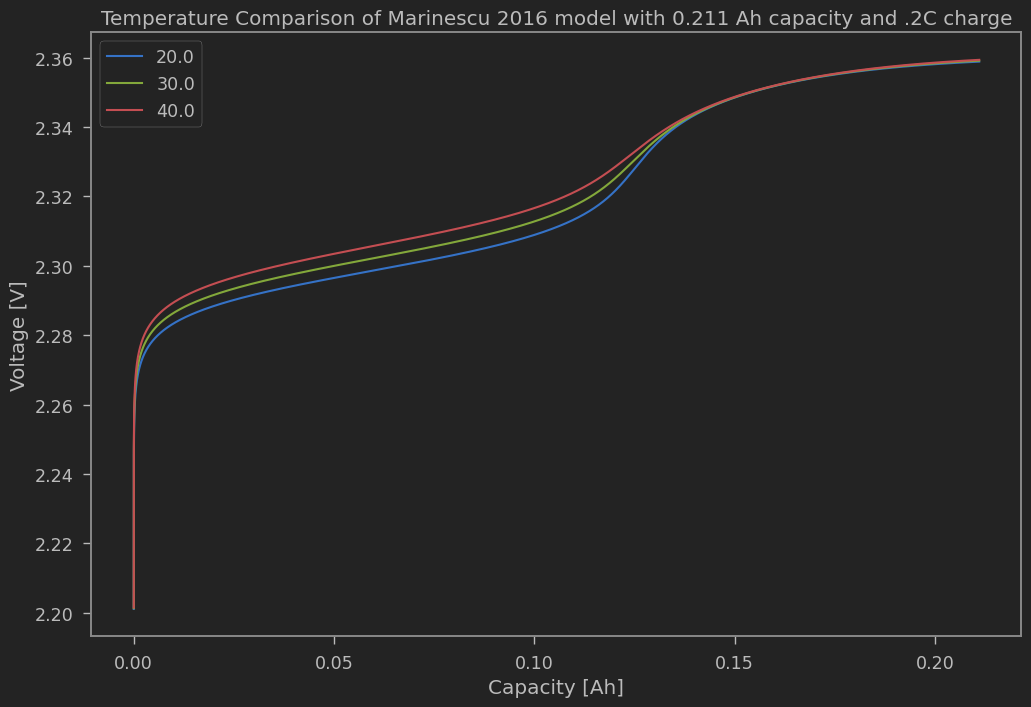

In [27]:
for sub_data in charge_data_2016:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Marinescu 2016 model with 0.211 Ah capacity and .2C charge")
plt.savefig("Marinescu 2016 Charge Temp Comparison.eps")
notify

In [57]:
def marinescu2018_charge_function(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -300)
    
    model = pybamm.lithium_sulfur.MarinescuEtAl2018()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.001},
            max_step_decrease_count = 15
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,1000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp
            return data
            
            break
        except:
            pass
        
    

In [58]:
charge_data_2018 = Parallel(n_jobs=-1)(delayed(marinescu2018_charge_function)(i) for i in inputs)

2020-12-10 11:30:17,133 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-10 11:30:17,133 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


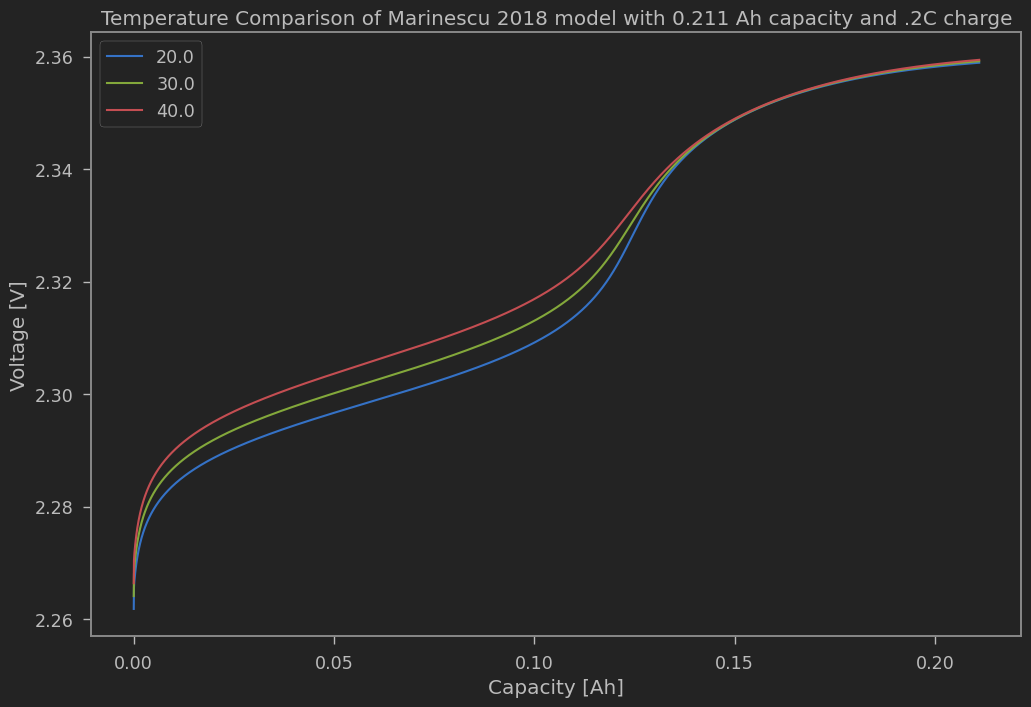

In [59]:
for sub_data in charge_data_2018:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Marinescu 2018 model with 0.211 Ah capacity and .2C charge")
plt.savefig("Marinescu 2018 Charge Temp Comparison.eps")
notify

In [60]:
def hua_2019_charge_function(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : temp,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass
        
    

In [61]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019 = Parallel(n_jobs=-1)(delayed(hua_2019_charge_function)(i) for i in inputs)

2020-12-10 11:40:33,336 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-10 11:40:33,337 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


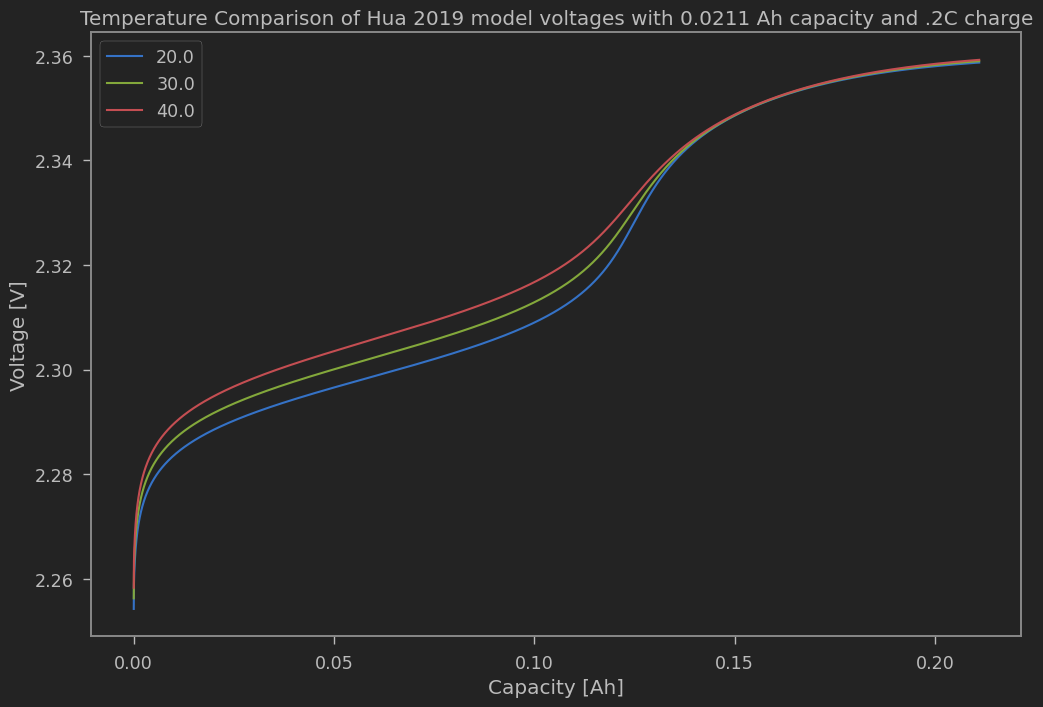

In [63]:
for sub_data in charge_data_2019:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages with 0.0211 Ah capacity and .2C charge")
plt.savefig("Hua 2019 Charge Temp Comparison.eps")
notify

2020-12-10 11:40:33,948 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2020-12-10 11:40:33,948 - [WARNING] backend_ps._is_transparent(734): The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


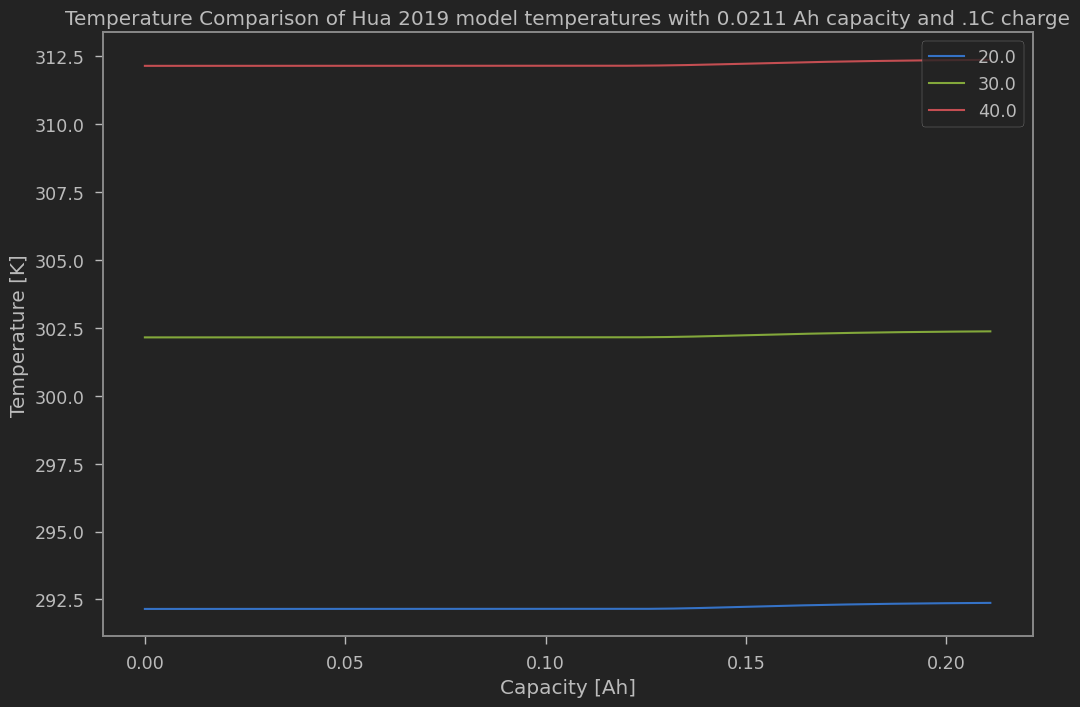

In [64]:
for sub_data in charge_data_2019:
    temp = sub_data[-1]
    Ah = sub_data[1]
    plt.plot(Ah,temp)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Temperature [K]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model temperatures with 0.0211 Ah capacity and .1C charge")
plt.savefig("Hua 2019 Charge Temp Comparison.eps")

In [65]:
def hua_2019_charge_function2(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : 298,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass
        
    

In [66]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019_2 = Parallel(n_jobs=-1)(delayed(hua_2019_charge_function2)(i) for i in inputs)

Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model voltages (ref temp = 298) with 0.0211 Ah capacity and .2C charge')

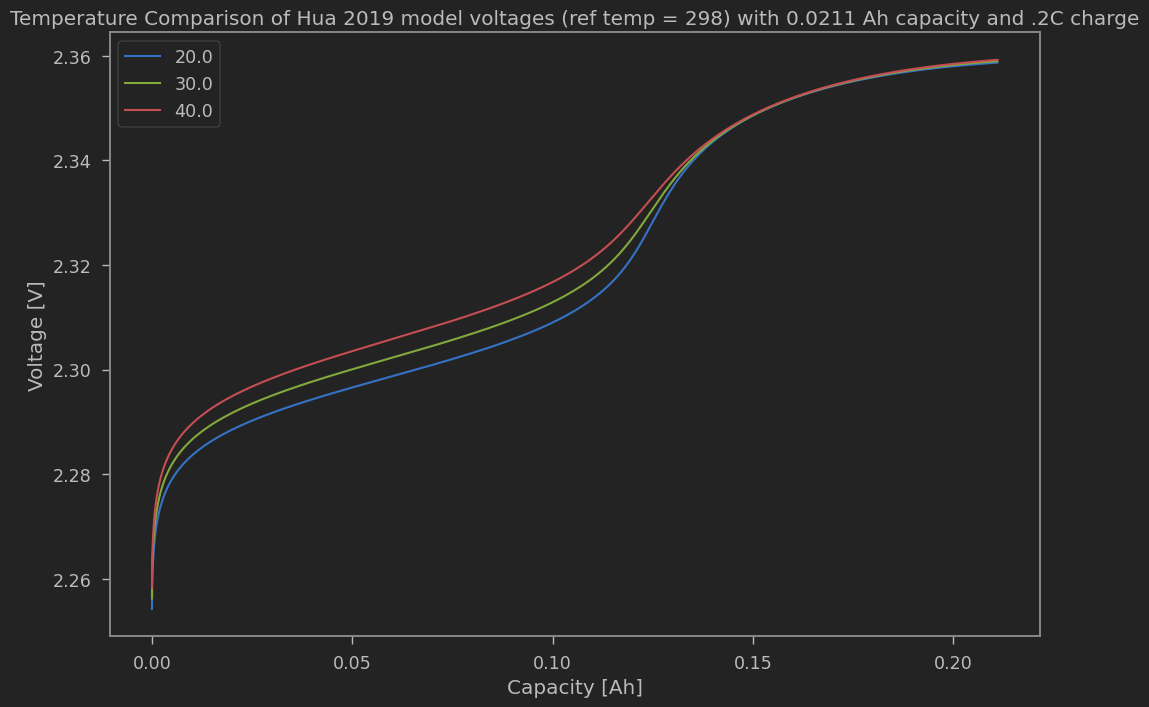

In [67]:
for sub_data in charge_data_2019:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages (ref temp = 298) with 0.0211 Ah capacity and .2C charge")


Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model (ref temp = 298) temperatures with 0.0211 Ah capacity and .1C charge')

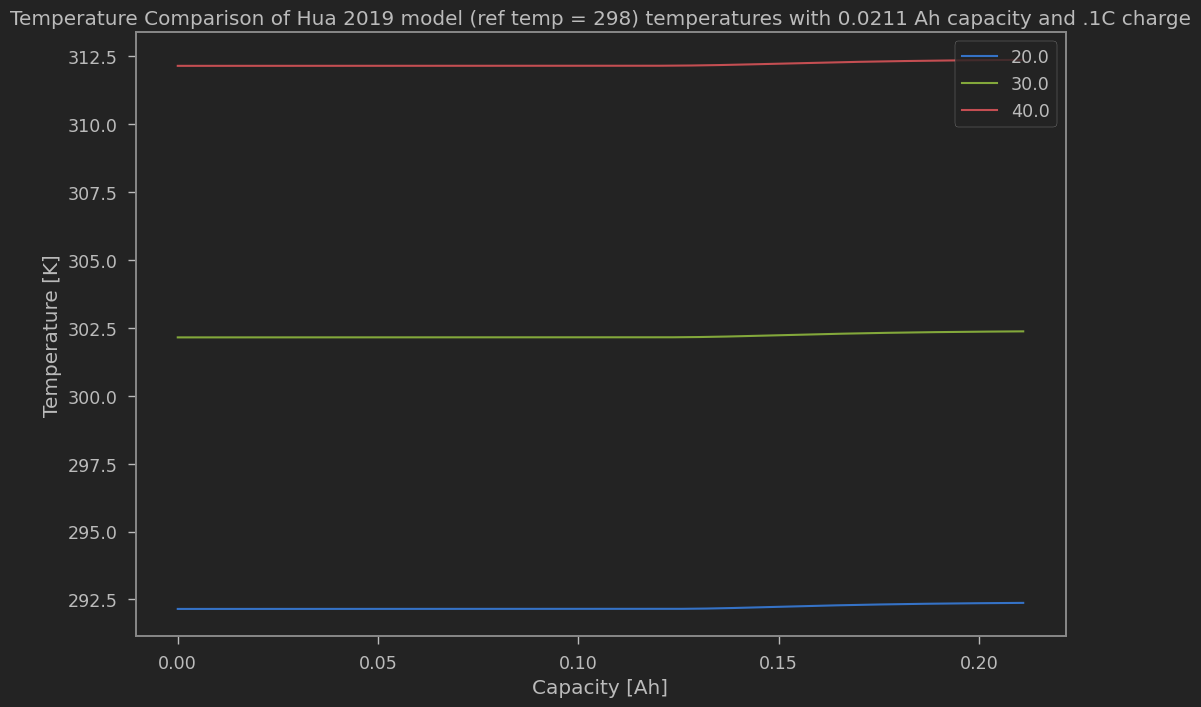

In [68]:
for sub_data in charge_data_2019:
    temp = sub_data[-1]
    Ah = sub_data[1]
    plt.plot(Ah,temp)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Temperature [K]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model (ref temp = 298) temperatures with 0.0211 Ah capacity and .1C charge")

In [13]:
def hua_2019_alg_charge_function(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019_alg()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : 298,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,10000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass
        
    

In [14]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019_alg = Parallel(n_jobs=-1)(delayed(hua_2019_alg_charge_function)(i) for i in inputs)

Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model voltages (ref temp = 298, Tc alg) with 0.0211 Ah capacity and .1C charge')

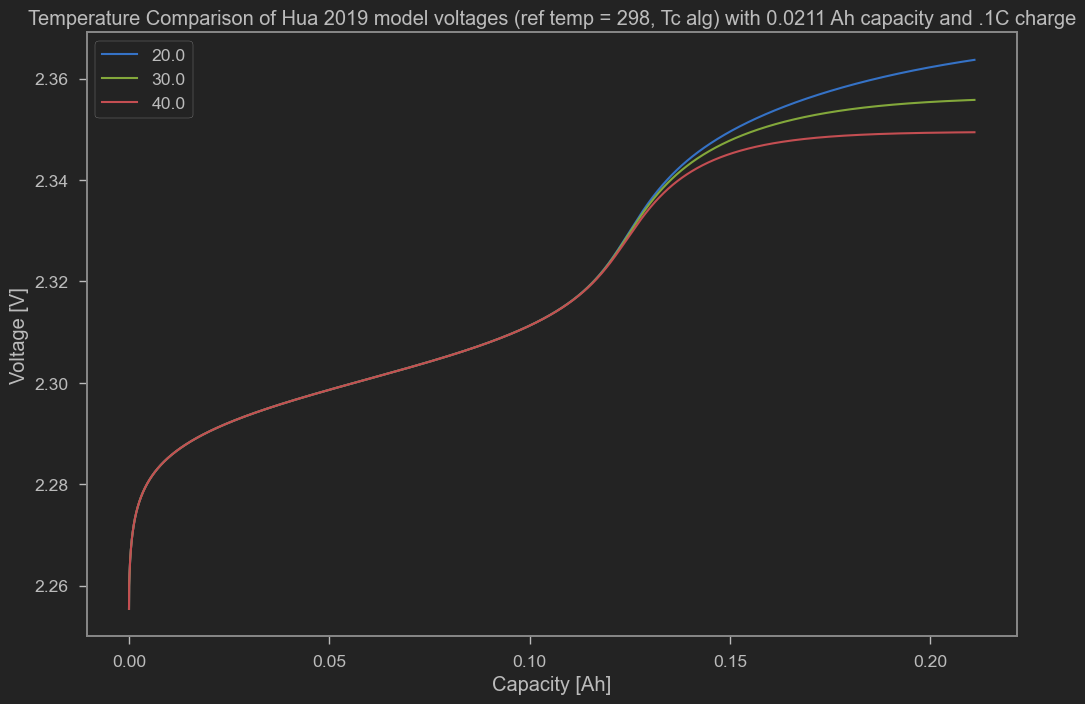

In [16]:
for sub_data in charge_data_2019_alg:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages (ref temp = 298, Tc alg) with 0.0211 Ah capacity and .1C charge")


In [10]:
def hua_2019_alg_charge_function2(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019_alg()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.0002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : temp,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": temp
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,100000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass
        

In [11]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019_alg2 = Parallel(n_jobs=-1)(delayed(hua_2019_alg_charge_function2)(i) for i in inputs)

Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model voltages (Tc alg) with 0.0211 Ah capacity and .2C charge')

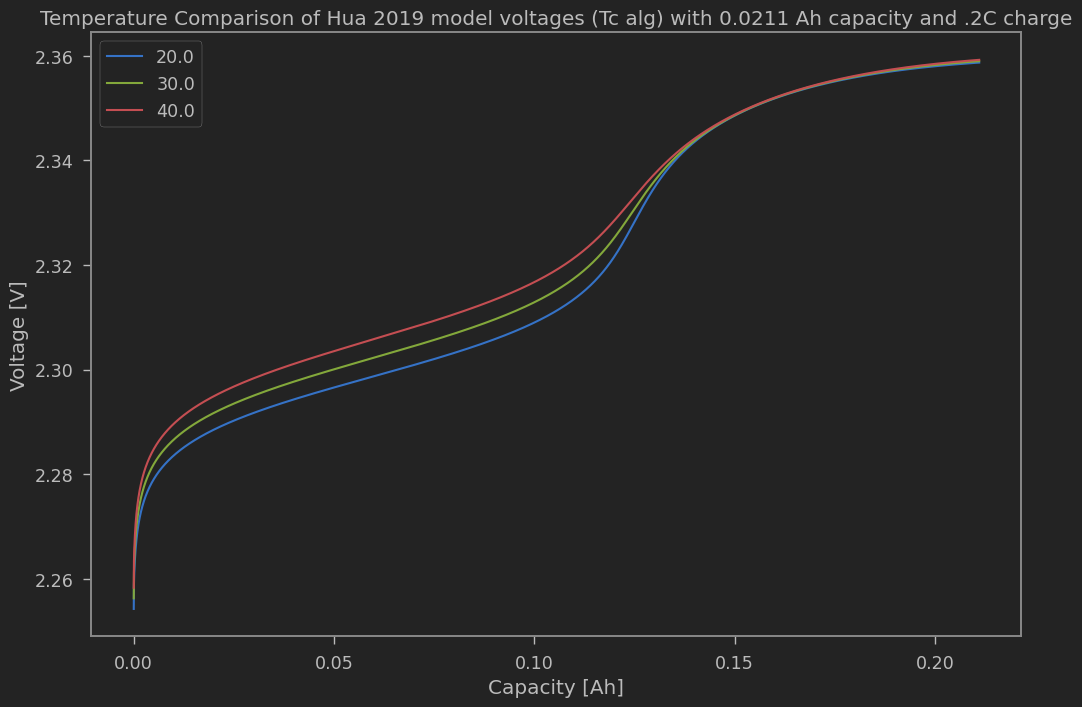

In [12]:
for sub_data in charge_data_2019_alg2:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages (Tc alg) with 0.0211 Ah capacity and .2C charge")


In [18]:
def hua_2019_alg_charge_function_ks(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019_alg()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 0.002,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : 298,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": 298
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,10000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass

In [19]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019_alg_ks = Parallel(n_jobs=-1)(delayed(hua_2019_alg_charge_function_ks)(i) for i in inputs)

Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model voltages (Tc alg, ks = 0.002) with 0.0211 Ah capacity and .1C charge')

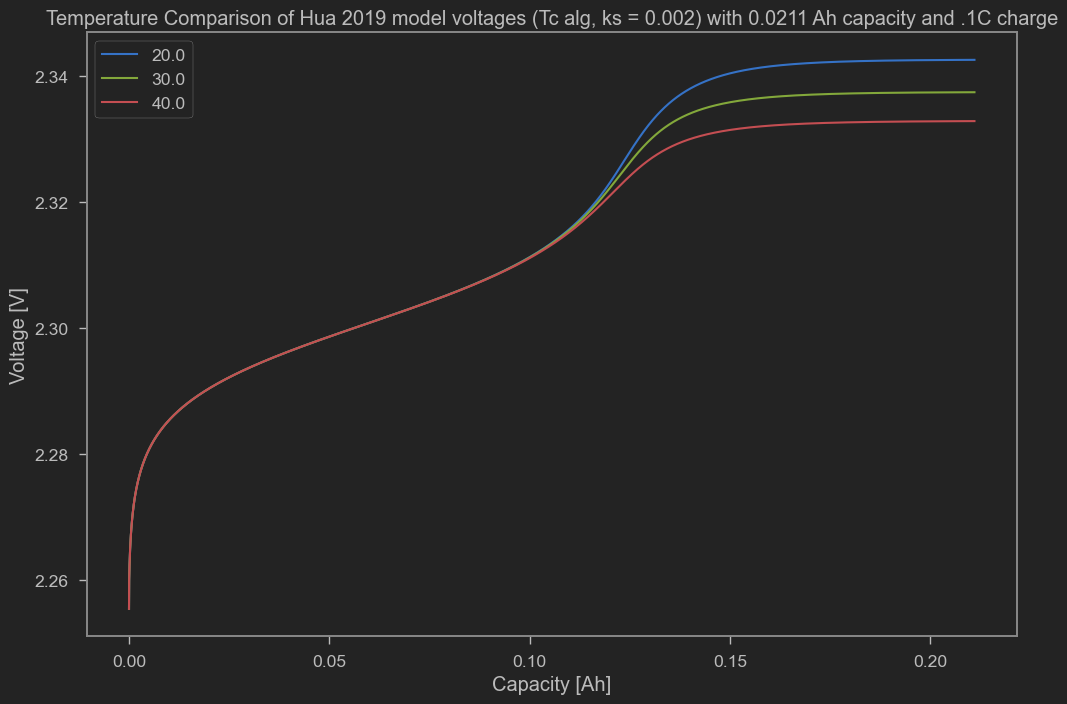

In [20]:
for sub_data in charge_data_2019_alg_ks:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages (Tc alg, ks = 0.002) with 0.0211 Ah capacity and .1C charge")


In [34]:
def hua_2019_alg_charge_function_ks(inputs):
    
    data, temp = inputs
    V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data, -100)
    
    model = pybamm.lithium_sulfur.HuaEtAl2019_alg()
    
    params = model.default_parameter_values
    params.update(
        {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S1_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Shuttle rate coefficient during charge [s-1]": 2.75e-5,
        "Shuttle rate coefficient during discharge [s-1]": 0.0,
        "Reference Temperature [K]" : 298,
        "Ambient Temperature [K]": temp,
        "Initial Cell Temperature [K]": 298
        }
    )
    # Set up and solve simulation
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, rtol=1e-3, extra_options_setup={"max_step_size": 0.1}
        ),
    )
    hours = 10
    time_in_seconds = hours*3600
    print("Starting temperature %f" %(temp))
    for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
        print("trying time %f" %j)
        try:
            # simulate
            sim.solve(np.linspace(0, j,10000))
            # extract data
            t = sim.solution.t
            Ah = abs(-0.0211)*t/3600
            V = sim.solution["Terminal voltage [V]"].entries
            S8 = sim.solution["S8 [g]"].entries
            S4 = sim.solution["S4 [g]"].entries
            S2 = sim.solution["S2 [g]"].entries
            S1 = sim.solution["S [g]"].entries
            Sp = sim.solution["Precipitated Sulfur [g]"].entries
            Tc = sim.solution["Cell Temperature [K]"].entries

            data = t, Ah, V, S8, S4, S2, S1, Sp, Tc
            return data
            
            break
        except:
            pass

In [35]:
temp_array = list(np.add([20,30,40], 272.15))
inputs = [(data[0], temp_array[0]),(data[1], temp_array[1]),(data[2], temp_array[2])]
charge_data_2019_alg_ks_low = Parallel(n_jobs=-1)(delayed(hua_2019_alg_charge_function_ks)(i) for i in inputs)

Text(0.5, 1.0, 'Temperature Comparison of Hua 2019 model voltages (Tc alg, ks = 2.75e-7) with 0.211 Ah capacity and .1C charge')

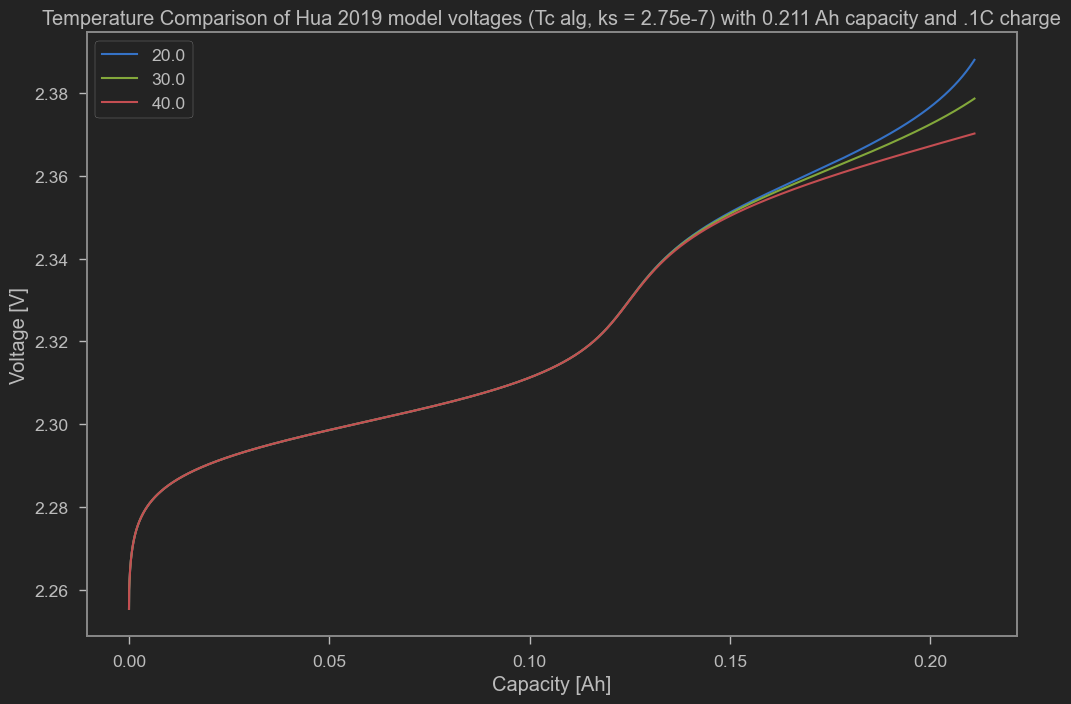

In [36]:
for sub_data in charge_data_2019_alg_ks_low:
    voltage = sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

        
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.legend(np.add(temp_array,-272.15))
plt.title("Temperature Comparison of Hua 2019 model voltages (Tc alg, ks = 2.75e-7) with 0.211 Ah capacity and .1C charge")


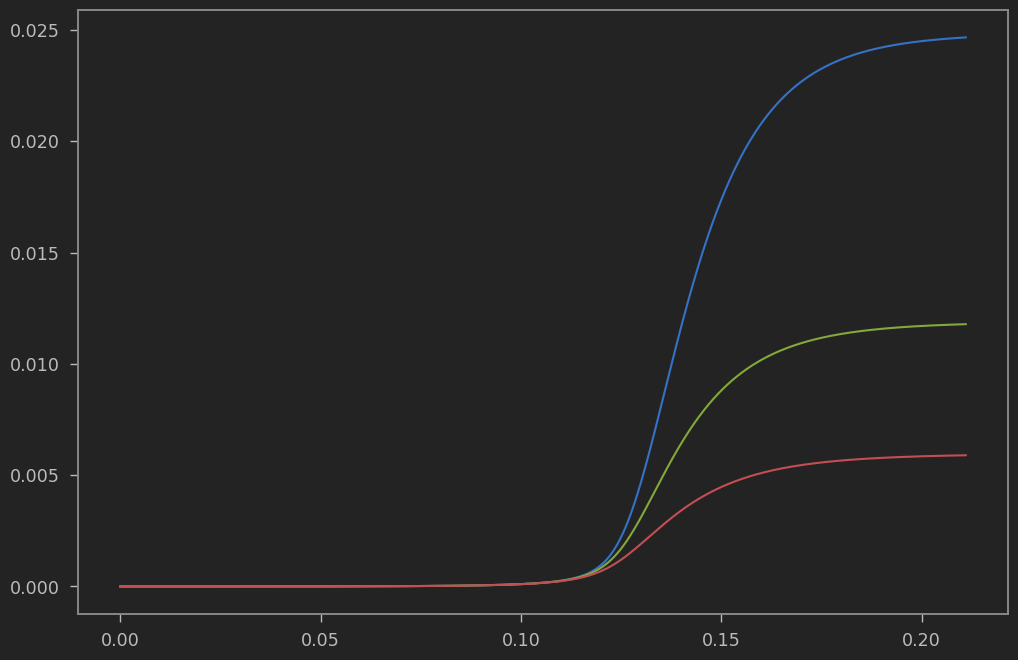

In [21]:
for sub_data in charge_data_2019_alg_ks:
    voltage = sub_data[3]*sub_data[2]
    Ah = sub_data[1]
    plt.plot(Ah,voltage)

In [20]:
sub_data[-1][0]

312.1499999999992

In [8]:
temp_array = list(np.add([20,30,40], 272.15))

In [24]:
V_initial, S8_initial, S4_initial, S2_initial, S1_initial, Sp_initial = ic_grab(data[0], -100)
    
model = pybamm.lithium_sulfur.HuaEtAl2019_alg()
temp = temp_array[-1]
params = model.default_parameter_values
params.update(
    {
    "Current function [A]": -0.0211,
    "Initial Condition for S8 ion [g]": S8_initial,
    "Initial Condition for S4 ion [g]": S4_initial,
    "Initial Condition for S2 ion [g]": S2_initial,
    "Initial Condition for S ion [g]": S1_initial,
    "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
    "Initial Condition for Terminal Voltage [V]": V_initial,
    "Shuttle rate coefficient during charge [s-1]": 0.002,
    "Shuttle rate coefficient during discharge [s-1]": 0.0,
    "Reference Temperature [K]" : 298,
    "Ambient Temperature [K]": temp,
    "Initial Cell Temperature [K]": temp
    }
)
# Set up and solve simulation
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, rtol=1e-6, extra_options_setup={"max_step_size": 0.1}
    ),
)
hours = 10
time_in_seconds = hours*3600
print("Starting temperature %f" %(temp))
for j in [time_in_seconds,time_in_seconds-100,time_in_seconds-200,time_in_seconds-300]:
    print("trying time %f" %j)
    try:
        # simulate
        sim.solve(np.linspace(0, j,1000))
        # extract data
        t = sim.solution.t
        Ah = abs(-0.0211)*t/3600
        V = sim.solution["Terminal voltage [V]"].entries
        S8 = sim.solution["S8 [g]"].entries
        S4 = sim.solution["S4 [g]"].entries
        S2 = sim.solution["S2 [g]"].entries
        S1 = sim.solution["S [g]"].entries
        Sp = sim.solution["Precipitated Sulfur [g]"].entries
        Tc = sim.solution["Cell Temperature [K]"].entries
        break
    except:
        pass

Starting temperature 312.150000
trying time 36000.000000


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

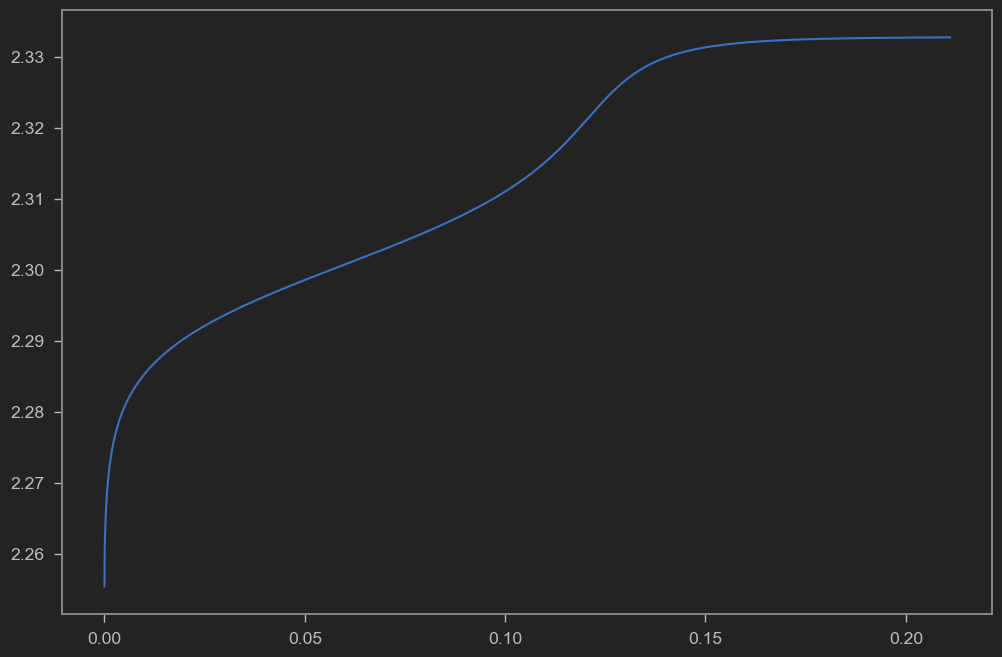

In [25]:
plt.plot(Ah, V)

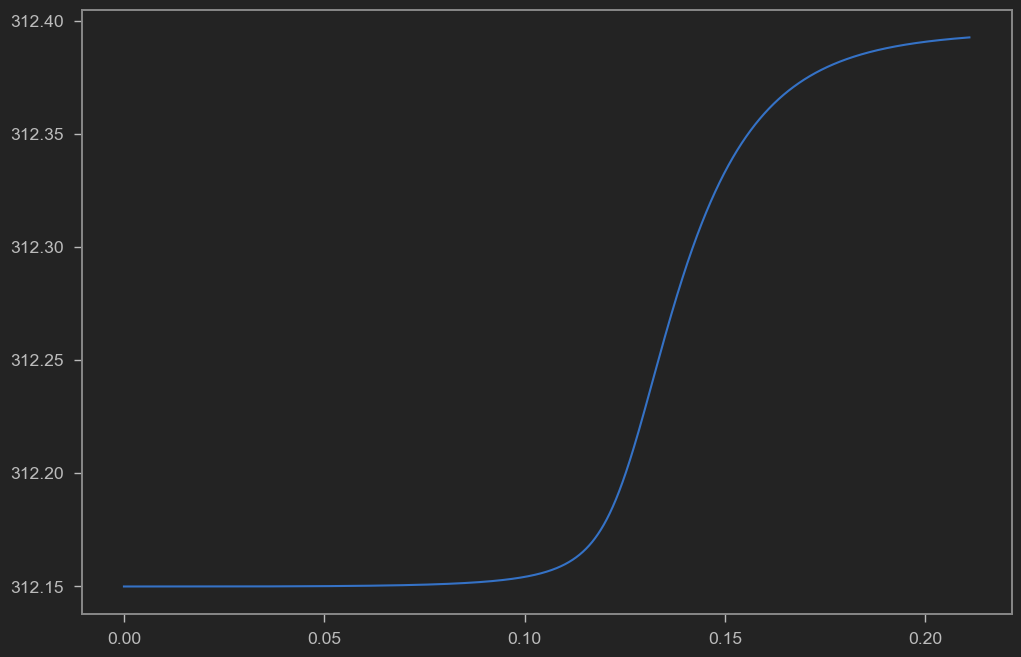

In [26]:
plt.plot(Ah, Tc)
notify

In [27]:
sim.build()

In [28]:
sim.parameter_values.keys

<bound method ParameterValues.keys of {'Active reaction area per cell [m2]': 0.96,
 'Ambient Temperature [K]': 312.15,
 'Apparent Geometric Area [m2]': 0.29,
 'Bruggeman Constant [-]': 6.0,
 'Cell Thickness [m]': 4e-05,
 'Cell heat capacity [J.g-1.K-1]': 2.0,
 'Cell heat transfer coefficient [W.K-1]': 0.2,
 'Cell mass [kg]': 0.129,
 'Conductivity Relation Slope [S.m2.mol]': 4.6e-07,
 'Current function [A]': -0.0211,
 'Density of precipitated Sulfur [g.L-1]': 2000.0,
 'Electrolyte volume per cell [L]': 0.0114,
 'Electron number per reaction [electrons]': 4.0,
 'Exchange current density H [A.m-2]': 10.0,
 'Exchange current density L [A.m-2]': 5.0,
 'Initial Cell Porosity [-]': 0.65,
 'Initial Cell Temperature [K]': 312.15,
 'Initial Condition for Precipitated Sulfur [g]': 0.0837726237997789,
 'Initial Condition for S ion [g]': 0.00011905033793461742,
 'Initial Condition for S2 ion [g]': 0.08389167413771856,
 'Initial Condition for S4 ion [g]': 0.00021665172455198365,
 'Initial Condition 

In [29]:
mc = sim.parameter_values['Cell mass [kg]'] # check this shouldn't be [g]
ch = sim.parameter_values['Cell heat capacity [J.g-1.K-1]']
ks0 = sim.parameter_values['Shuttle rate coefficient during charge [s-1]']
A = sim.parameter_values[ 'Pre-Exponential factor in Arrhenius Equation [J.mol-1]']
Na = pybamm.parameters.constants.R.value/pybamm.parameters.constants.k_b
T0 = sim.parameter_values[ 'Reference Temperature [K]']

def ks(Tc):
    return ks0*np.exp(-A*Na*( (1/Tc) - (1/T0)))

n4 = 4
F = pybamm.parameters.constants.F.value
nS8 = 8
Ms = 32
h = sim.parameter_values[ 'Cell heat transfer coefficient [W.K-1]']
Ta = sim.parameter_values[ 'Ambient Temperature [K]']

def dTcdt(Tc, S8, V):
    return ((ks(Tc)*n4*F*S8*V - h*(Tc-Ta)))/(mc*ch)

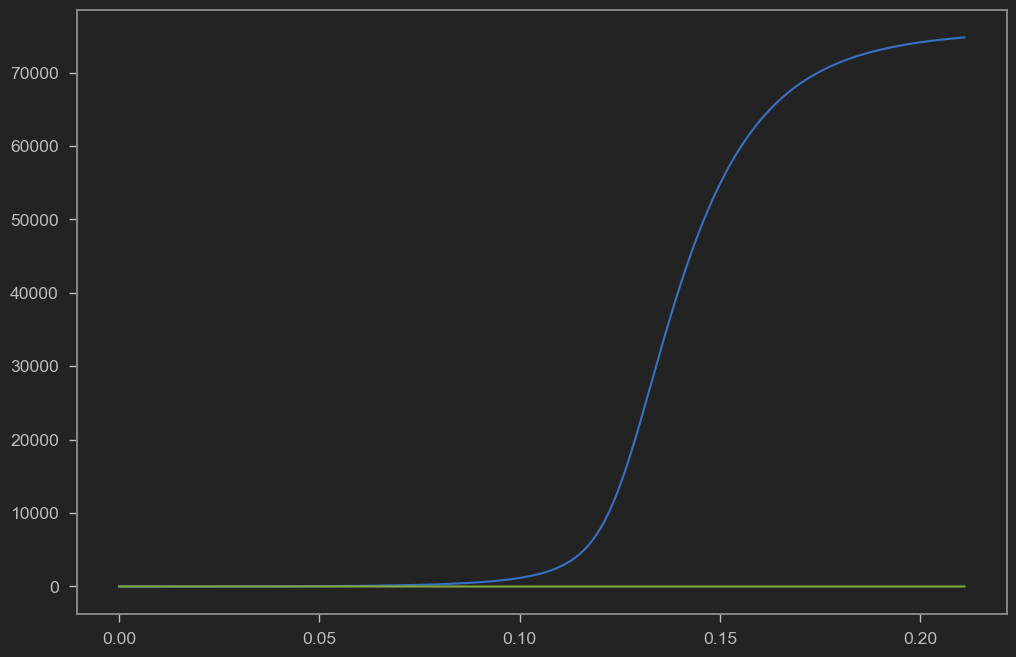

In [30]:
plt.plot(Ah, dTcdt(Tc,S8,V))
plt.plot(Ah[:-1], np.diff(Tc)/np.diff(t))

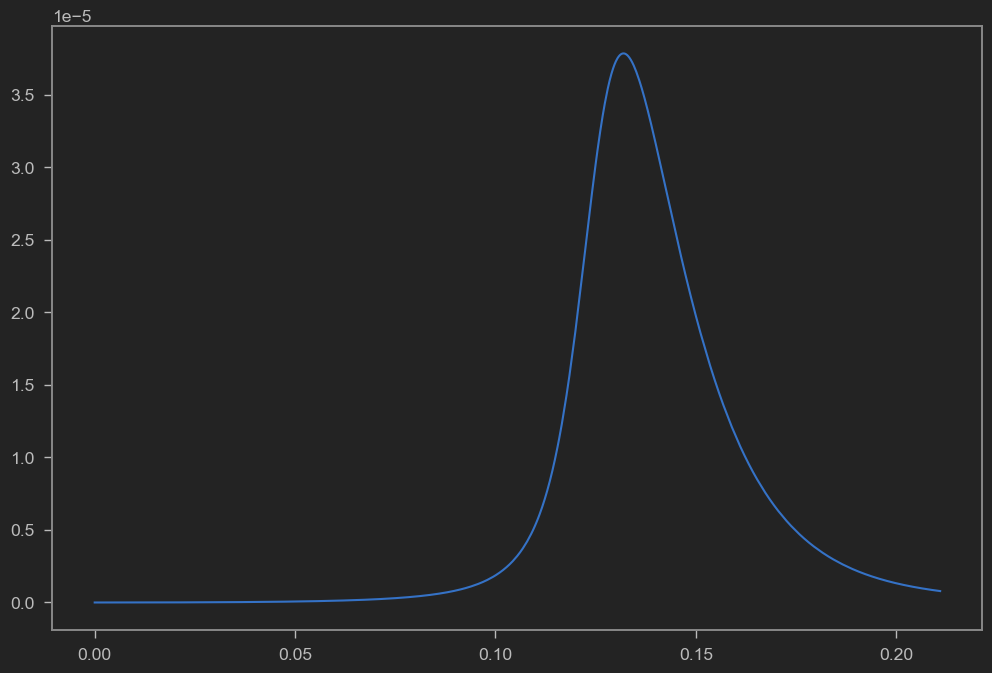

In [31]:
plt.plot(Ah[:-1], np.diff(Tc)/np.diff(t))

In [32]:
for key in sim.solution.model.variables.keys():
    print(key)

Terminal voltage [V]
Current [A]
Discharge capacity [A.h]
Time [s]
S8 [g]
S4 [g]
S2 [g]
S [g]
Precipitated Sulfur [g]
Cell Temperature [K]
Shuttle coefficient [s-1]
Shuttle rate [g-1.s-1]
High plateau potential [V]
Low plateau potential [V]
High plateau over-potential [V]
Low plateau over-potential [V]
High plateau current [A]
Low plateau current [A]
Theoretical capacity [Ah]
Algebraic condition


In [60]:
sim.solution.model.

In [56]:
np.shape(sim.solution.y)

(8, 7993)

In [33]:
print(mc )
print(ch)
print(ks0) # different from the paper
print(A)
print(Na)
print(T0)
print(n4)
print(F) # approximately the same as in the paper
print(nS8)
print(Ms)
print(h)


0.129
2.0
0.002
8.9712e-20
6.0221407598890085e+23
298
4
96485.33212
8
32
0.2
312.15
